<center> Mini Course -  Introduction to Data Science
<center> Hands-on Tutorial Day - 3
<center> Data Distribution

<h1> Contents: </h1>
1. Plotting an equation <br />
2. Different data distribution <br />
3. Fitting a curve <br />


### Plotting a equation

In [1]:
# Dependency packages
import scipy
from scipy import stats
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

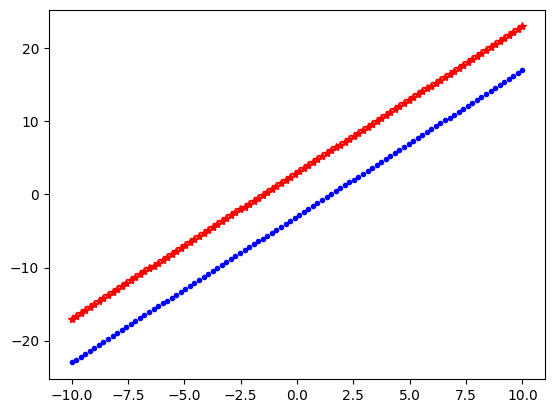

In [2]:
# Plotting a function f(x) = 2x+3 and f(x) = 2x-3 in a same graph for a domain of [-10,10]

x = np.linspace(-10,10,100)
x

y1 = 2*x+3
y2 = 2*x-3

plt.plot(x,y1,'*r')
plt.plot(x,y2,'.b')

**Exercise questions:**  
Plot a function f(x) = sin(x) and f(x) = cos(x) between the interval of [-3$\pi$, 3$\pi$]

Text(0, 0.5, 'f(x)')

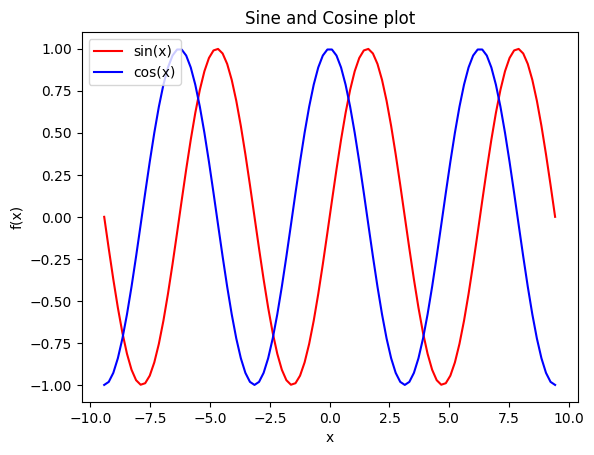

In [3]:
# Using scipy
x = np.linspace(-3*math.pi,3*math.pi,100)

y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y1,'-r')
plt.plot(x,y2,'-b')
plt.title('Sine and Cosine plot')
plt.legend(['sin(x)', 'cos(x)'])
plt.xlabel('x')
plt.ylabel('f(x)')

What-if there are no numpy and scipy package??

Text(0, 0.5, 'f(x)')

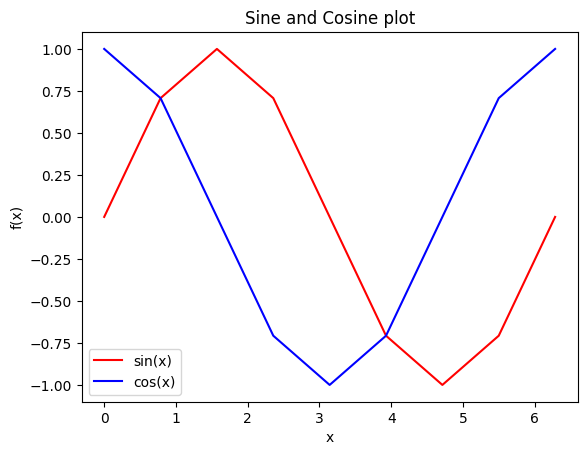

In [4]:
# Without scipy and numpy
from math import pi
x = [0,pi/4,pi/2,3/4*pi,pi,5/4*pi,3/2*pi,7/4*pi,2*pi]

#def sincoscurve(x):
y1 = []
for i in range(len(x)):
  y1.append(math.sin(x[i]))
  i+=1
y2 = []
for i in range(len(x)):
  y2.append(math.cos(x[i]))
  i+=1
#return y1,y2

#[yf1,yf2] = sincoscurve(x)

plt.plot(x,y1,'-r')
plt.plot(x,y2,'-b')
plt.title('Sine and Cosine plot')
plt.legend(['sin(x)', 'cos(x)'])
plt.xlabel('x')
plt.ylabel('f(x)')

### Probability distributions


#### Random number generation

To create a random variable for the different distribution analysis

In [8]:
import random
#Create a random integer between a and b
random.randint(0,10)

3

In [10]:
# Return a float in the interval [0,1]
random.random()

0.3680338749499361

In [13]:
# To randomly choose from the choices give
random.choice([0,1,3,5])

0

**Exercise questions**
Write a program that generates and prints 50 random integers, each between 3 and 6



In [ ]:
x = []

for i in range(50):
  x.append(random.randint(3,6))

x

#### Binomial distribution

![Binomial distribution.png](https://drive.google.com/uc?export=view&id=13yt9VVf1hhDi0O2w1bItmIE0NYJtdyqw)

##### Plotting binomial distribution

col_0   0   1   2    3    4    5    6    7   8   9   10
row_0                                                  
counts   2   6  48  121  207  238  212  108  48   9   1


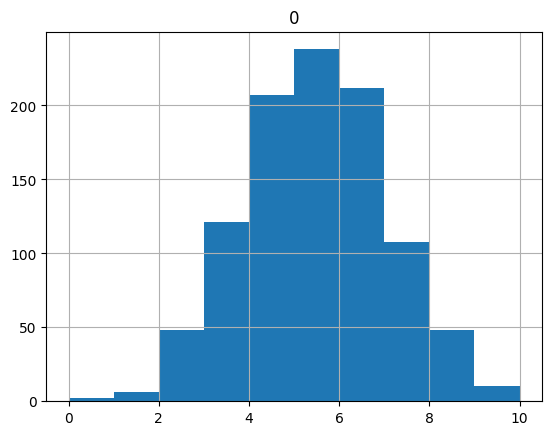

In [16]:
# Using coin flips tasks for binomial distribution
fair_coin_flips = stats.binom(n=10, p=0.5).rvs(size = 1000)
# n - Number of flips per trial; p - Success probability; Size - Number of trials

# Tabulate the number of successes
print(pd.crosstab(index="counts", columns= fair_coin_flips))

# Plotting the obtained distribution as a histogram
pd.DataFrame(fair_coin_flips).hist(range=(0,10), bins=10);

<ipython-input-17-dd5147203aa0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(fair_coin_flips,


[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

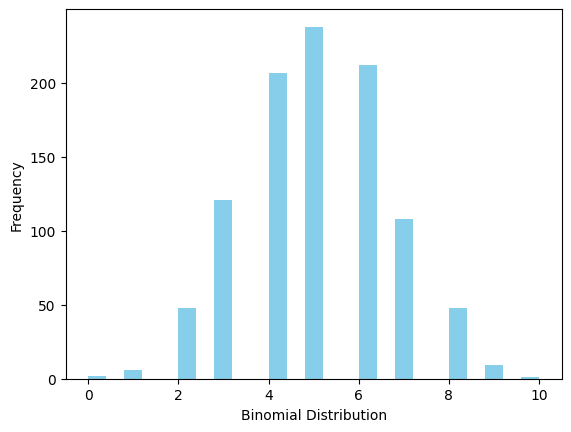

In [17]:
# Plotting using distplot
import seaborn as sns
ax = sns.distplot(fair_coin_flips,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

##### Probability Mass function

In [19]:
# Different characteristics of a distribution
# Probability mass function for a 5 successes in 10 flips
stats.binom.pmf(k=5,n=10,p=0.5)

0.24609375000000003

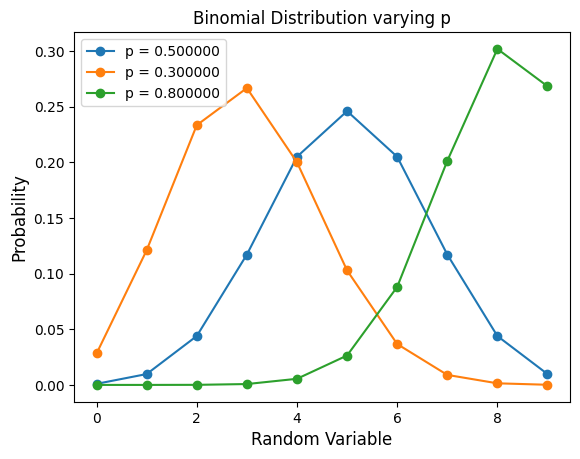

In [20]:
# Plotting Probability mass function for three different success probabilities
# [p = 0.5, p = 0.3, p = 0.8]
prob = [0.5,0.3,0.8]

# Identifying PMF
for i in prob:
  x = np.arange(0,10)
  binom_pmf_data = stats.binom.pmf(x,10,i)
  plt.plot(x, binom_pmf_data, '-o', label="p = {:f}".format(i))
  #plt.plot(x, binom_pmf_data2, '-*', label="p = {:f}".format(i))
  plt.xlabel('Random Variable', fontsize=12)
  plt.ylabel('Probability', fontsize=12)
  plt.title("Binomial Distribution varying p")
  plt.legend()

In [21]:
# Codes to identify a PMF
from math import factorial as fac
def pmf_binom(k, n, p):
  pmf_val = fac(n) / (fac(k) * fac(n - k)) * p**k * (1-p)**(n-k)
  return pmf_val

def cdf_binom(k, n, p):
  pmfBinom = []
  for j in range(0,k+1):pmfBinom.append(pmf_binom(j,n,p))
  cdf_val = sum(pmfBinom)
  return cdf_val

In [23]:
x = np.arange(0,10)
x


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

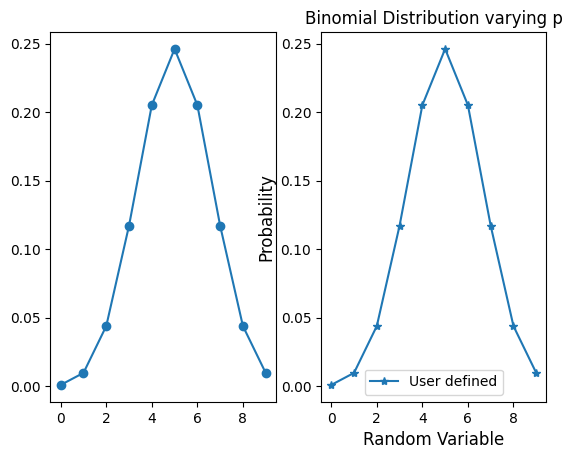

In [24]:
# Plotting Probability mass function with the user-defined function

# Identifying PMF

x = np.arange(0,10)
binom_pmf_data = stats.binom.pmf(x,10,0.5)
binom_pmf_data2 = []
for j in x:binom_pmf_data2.append(pmf_binom(k = j, n = 10, p = 0.5))
plt.subplot(1,2,1)
plt.plot(x, binom_pmf_data, '-o',label = "In-built")
plt.subplot(1,2,2)
plt.plot(x, binom_pmf_data2, '-*',label="User defined")
plt.xlabel('Random Variable', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Binomial Distribution varying p")
plt.legend()


##### Cumulative distribution function

In [25]:
# Cumulative distribution function for a 5 successes in 10 flips
print("In-built function gives: ", stats.binom.cdf(k=5,n=10,p=0.5))
print("User-defined function gives: ", cdf_binom(k=5,n=10,p=0.5))

In-built function gives:  0.623046875
User-defined function gives:  0.623046875


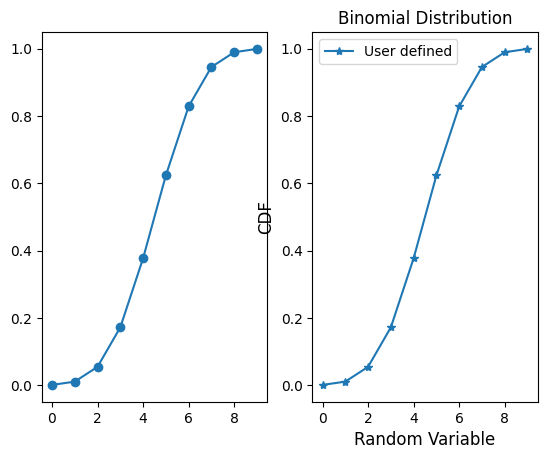

In [27]:
# Plotting a CDF
x = np.arange(0,10)
binom_cdf_data = stats.binom.cdf(x,10,0.5)
binom_cdf_data2 = []
for j in x:binom_cdf_data2.append(cdf_binom(k = j, n = 10, p = 0.5))
plt.subplot(1,2,1)
plt.plot(x, binom_cdf_data, '-o', label="In-built")
plt.subplot(1,2,2)
plt.plot(x, binom_cdf_data2, '-*', label="User defined")
plt.xlabel('Random Variable', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.title("Binomial Distribution")
plt.legend()

#### Poisson Distribution

![Poisson distribution.png](https://drive.google.com/uc?export=view&id=1VQ7SCC9SHT0mNq-UCvKwF8Mte5NzoVVO)

##### Plotting Poisson distribution

col_0     0    1    2   3   4  5  6
row_0                              
counts  340  386  183  64  22  4  1


<ipython-input-36-044149b17a9c>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(poisson_data,


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

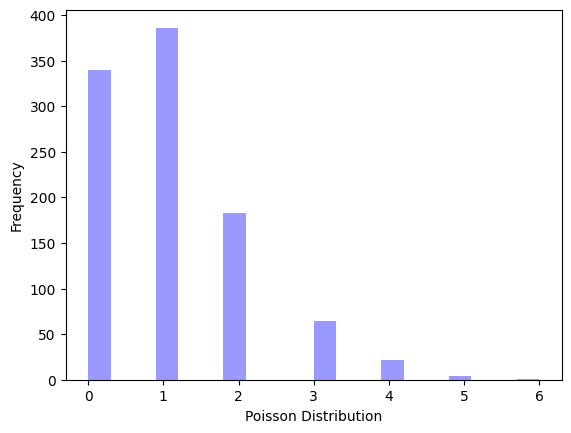

In [36]:
# Plotting using random variable
poisson_data = stats.poisson(mu = 1).rvs(size = 1000)

# print the table
print( pd.crosstab(index="counts", columns= poisson_data))

# plotting a histogram
ax = sns.distplot(poisson_data,
                  kde=False,
                  color='blue', bins=20)
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

##### Probability mass function and cumulative distribution function

Text(0.5, 1.0, 'Poisson Distribution of n')

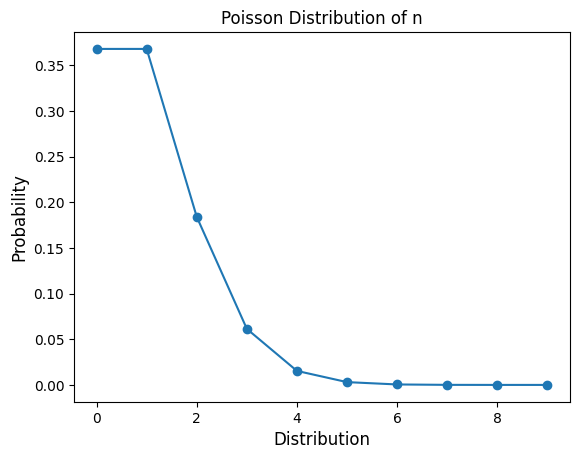

In [33]:
# Probability density curve for the poisson distribution
n = np.arange(0,10)
poisson_pmf = stats.poisson.pmf(n,1)
plt.plot(n, poisson_pmf,'-o')
plt.xlabel('Distribution', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Poisson Distribution of n")

In [34]:
# PMF of poisson distribution for a success/ event of 3
stats.poisson.pmf(3,1)

0.06131324019524039

In [35]:
# CDF of poisson distribution for a success/ event of 4
stats.poisson.cdf(4,1)

0.9963401531726563

#### Normal distribution

In [43]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

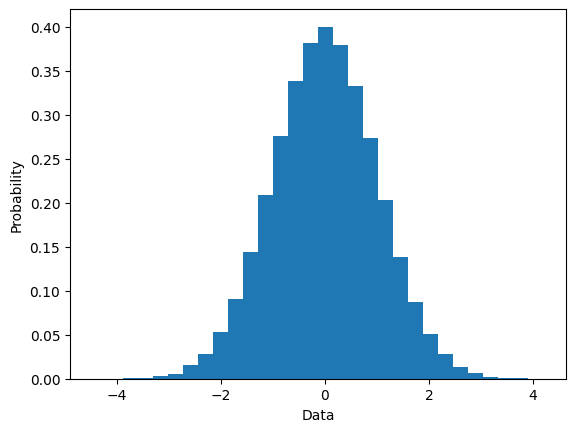

In [50]:
#np.random.seed(42)
x = np.random.normal(size=100000)

plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

![Normal distribution.png](https://drive.google.com/uc?export=view&id=1Q-AtKexVYueUoU0XYub-JCGqNWS3OsNg)

##### Plotting normal distribution

<ipython-input-53-2de0839d932f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(norm_data,


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

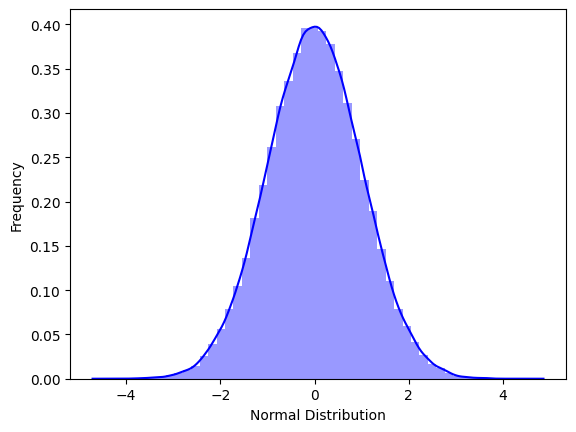

In [53]:
# Generate data
norm_data = stats.norm(scale = 1, loc = 0).rvs(100000)

# Visualize the data
ax = sns.distplot(norm_data,
                  bins=50,
                  kde=True,
                  color='blue')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

##### Probability density function

Text(0.5, 1.0, 'Normal Distribution of x')

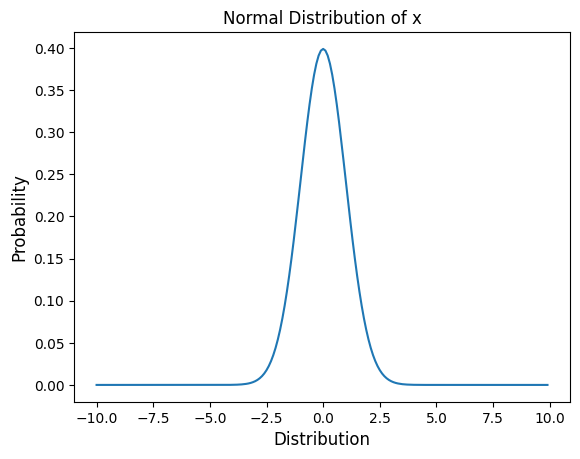

In [54]:
n = np.arange(-10,10,0.1)
norm = stats.norm.pdf(n,0,1)
plt.plot(n, norm)
plt.xlabel('Distribution', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Normal Distribution of x")

<ipython-input-55-9b327cf133be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(n,


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

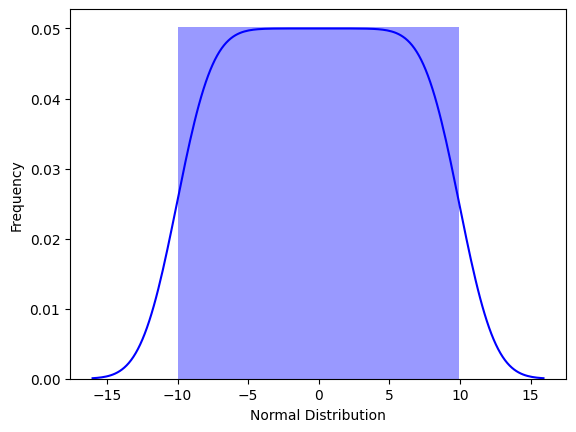

In [55]:
ax = sns.distplot(n,
                  bins=50,
                  kde=True,
                  color='blue')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [56]:
# Function to create PDF for normal distribution
def normal_dist(x,mean,sd):
  prob_density = (1/(sd *(np.sqrt(np.pi*2)))) * np.exp(-0.5*((x-mean)/sd)**2)
  return prob_density

def norm_cdf(x,mean,sd):
  x = (x-mean)/sd;
  # CDF can be calculated using error function: x should x-mean/sd
  return 0.5*(1+math.erf(x/math.sqrt(2)))


Text(0.5, 1.0, 'Normal Distribution of x')

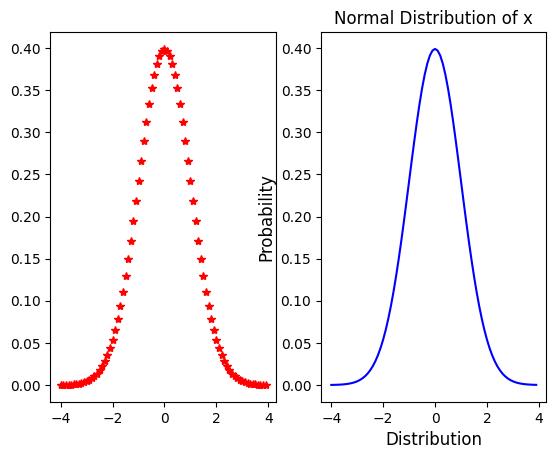

In [59]:
n = np.arange(-4,4,0.1)
#Apply function to the data.
norm_pdf_data = stats.norm.pdf(n,0,1)
norm_pdf_data2 = normal_dist(n,0,1)
plt.subplot(1,2,1)
plt.plot(n, norm_pdf_data, '*r')
plt.subplot(1,2,2)
plt.plot(n, norm_pdf_data,'b')
plt.xlabel('Distribution', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Normal Distribution of x")

In [60]:
# Probability under 1.96 and 1
prob_under = stats.norm.cdf(x= -1, loc = 0,scale= 1)
prob_over = 1 - stats.norm.cdf(x= 1, loc = 0,scale= 1)
print(1 - (prob_under + prob_over))

0.6826894921370859


0.24197072451914337


Text(0.1, 0.2, '0.6826894921370859')

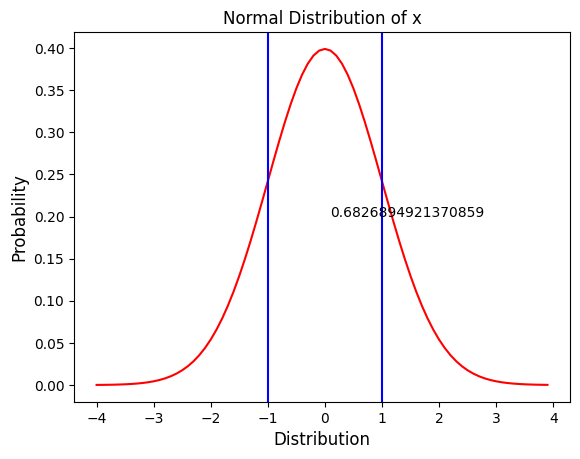

In [61]:
n = np.arange(-4,4,0.1)
#Apply function to the data.
norm = normal_dist(n,0,1)
plt.plot(n, norm, color = 'red')
plt.xlabel('Distribution', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Normal Distribution of x")
print(stats.norm.pdf(x= 1, loc = 0,scale= 1))
plt.axvline(1, color = 'b')
plt.axvline(-1, color = 'b')
plt.text(x=0.1, y=0.2, s= 1 - (prob_under + prob_over))

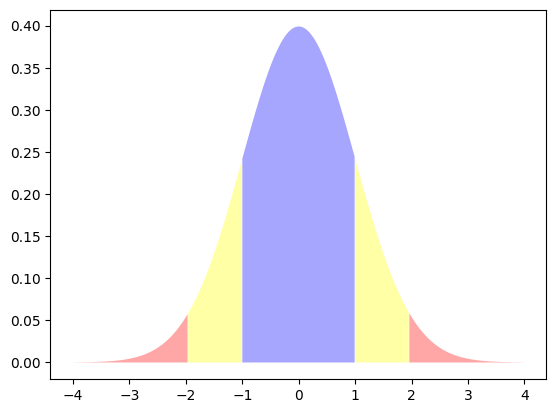

In [62]:
# Normal distribution areas
plt.fill_between(x=np.arange(-4,-1.96,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-1.96,0.01)) ,
                 facecolor='red',alpha=0.35)

plt.fill_between(x=np.arange(1.96,4,0.01),
                 y1= stats.norm.pdf(np.arange(1.96,4,0.01)) ,
                 facecolor='red',alpha=0.35)

plt.fill_between(x=np.arange(-1.96,-1,0.01),
                 y1= stats.norm.pdf(np.arange(-1.96,-1,0.01)) ,
                 facecolor='yellow',alpha=0.35)

plt.fill_between(x=np.arange(1,1.96,0.01),
                 y1= stats.norm.pdf(np.arange(1,1.96,0.01)) ,
                 facecolor='yellow',alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01),
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',alpha=0.35)

##### cumulative distribution function

In [63]:
# loc - Mean; scale = Standard deviation
print('In-built function gives:',stats.norm.cdf(x= -1, loc = 1,scale= 2))
print("User-defined function gives:",norm_cdf(-1,1,2))

In-built function gives: 0.15865525393145707
User-defined function gives: 0.15865525393145707


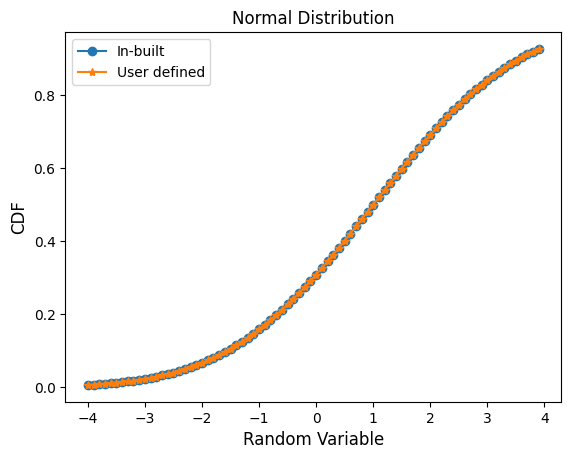

In [64]:
# Plotting CDF
# Plotting a CDF
x = np.arange(-4,4,0.1)
norm_cdf_data = stats.norm.cdf(n,1,2) # normal distribution with a mean of 1 and standard deviation of 2
norm_cdf_data2 = []
for j in x:norm_cdf_data2.append(norm_cdf(j,1,2))
plt.plot(x, norm_cdf_data, '-o', label="In-built")
plt.plot(x, norm_cdf_data2, '-*', label="User defined")
plt.xlabel('Random Variable', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.title("Normal Distribution")
plt.legend()

In [ ]:
# Probability distribution for specific quantiles
print( stats.norm.ppf(q=0.025, loc =0, scale = 1) )

**Exercise questions**  
a. Plot the uniform and poisson distribution using random variables

b. Plot the probability density curve for uniform and poisson distribution for a range of [0,10]

#### Uniform Distribution

![Uniform distribution.png](https://drive.google.com/uc?export=view&id=1C7Em-liBucusiLMhcMqWpuPunO9QRraY)

##### Plotting uniform distribution

<ipython-input-66-85268c29f938>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(uniform_data,


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

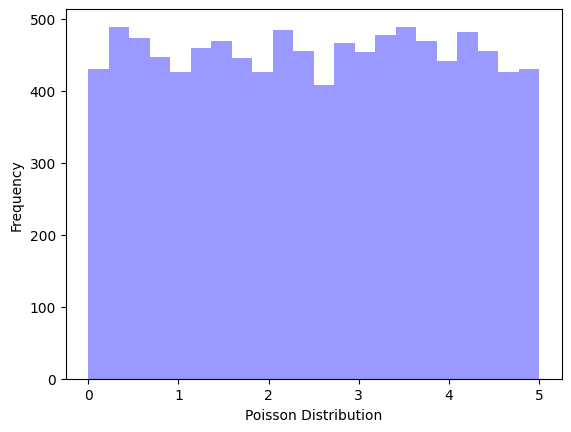

In [66]:
# Plot with the random variable
# Plotting using random variable
uniform_data = stats.uniform(loc = 0, scale = 5).rvs(size = 10000)

# plotting a histogram
ax = sns.distplot(uniform_data,
                  kde=False,
                  color='blue')
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

##### Probability mass function and cumulative distribution function

Text(0.5, 1.0, 'Uniform Distribution of n')

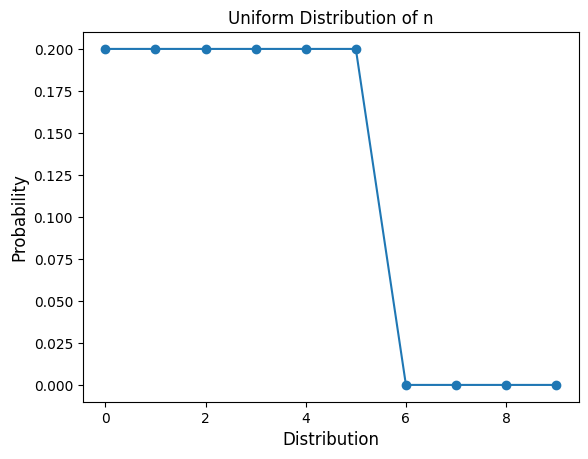

In [67]:
# Probability density curve for the uniform distribution
n = np.arange(0,10)
uniform_pdf = stats.uniform.pdf(n,0,5)
plt.plot(n, uniform_pdf,'-o')
plt.xlabel('Distribution', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Uniform Distribution of n")

In [70]:
# PDF of uniform distribution
stats.uniform.pdf(5,0,10)

0.1

In [69]:
# CDF of uniform distribution
stats.uniform.cdf(5,0,5)

1.0

#### Fitting a distribution

In [72]:
X = scipy.stats.binom.rvs(10,0.4,size =10000,random_state = 5)
X

array([3, 6, 3, ..., 4, 3, 5])

In [85]:
X = []

for i in range(1000):
  X.append(random.randint(5,10))

X = np.array(X)

(7.529, 1.698575579713779)


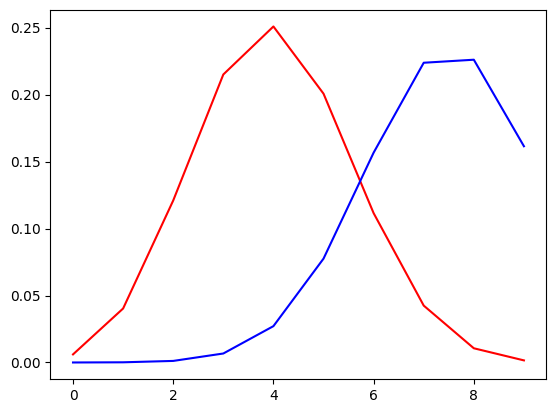

In [86]:
# Fitting a distribution from random variables generated
#

param = scipy.stats.norm.fit(X)
print(param)

data = np.arange(0,10)
binom_fit_data = stats.binom.pmf(data,10,0.4)
norm_fit_data = stats.norm.pdf(data,param[0],param[1])

plt.plot(data,binom_fit_data,'-r')
plt.plot(data,norm_fit_data,'-b')

In [74]:
param = scipy.stats.norm.fit(X)
print(param)

(4.0107, 1.5380460038633437)


##### Sources:
1. [A complete tutorial on visualizing probability distributions in python](https://analyticsindiamag.com/a-complete-tutorial-on-visualizing-probability-distributions-in-python/)  
2. [Probability Distributions in Python ](https://www.datacamp.com/tutorial/probability-distributions-python)  
3. [scipy tutorial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html?highlight=uniform#scipy.stats.uniform)
